In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('clean_data.csv')

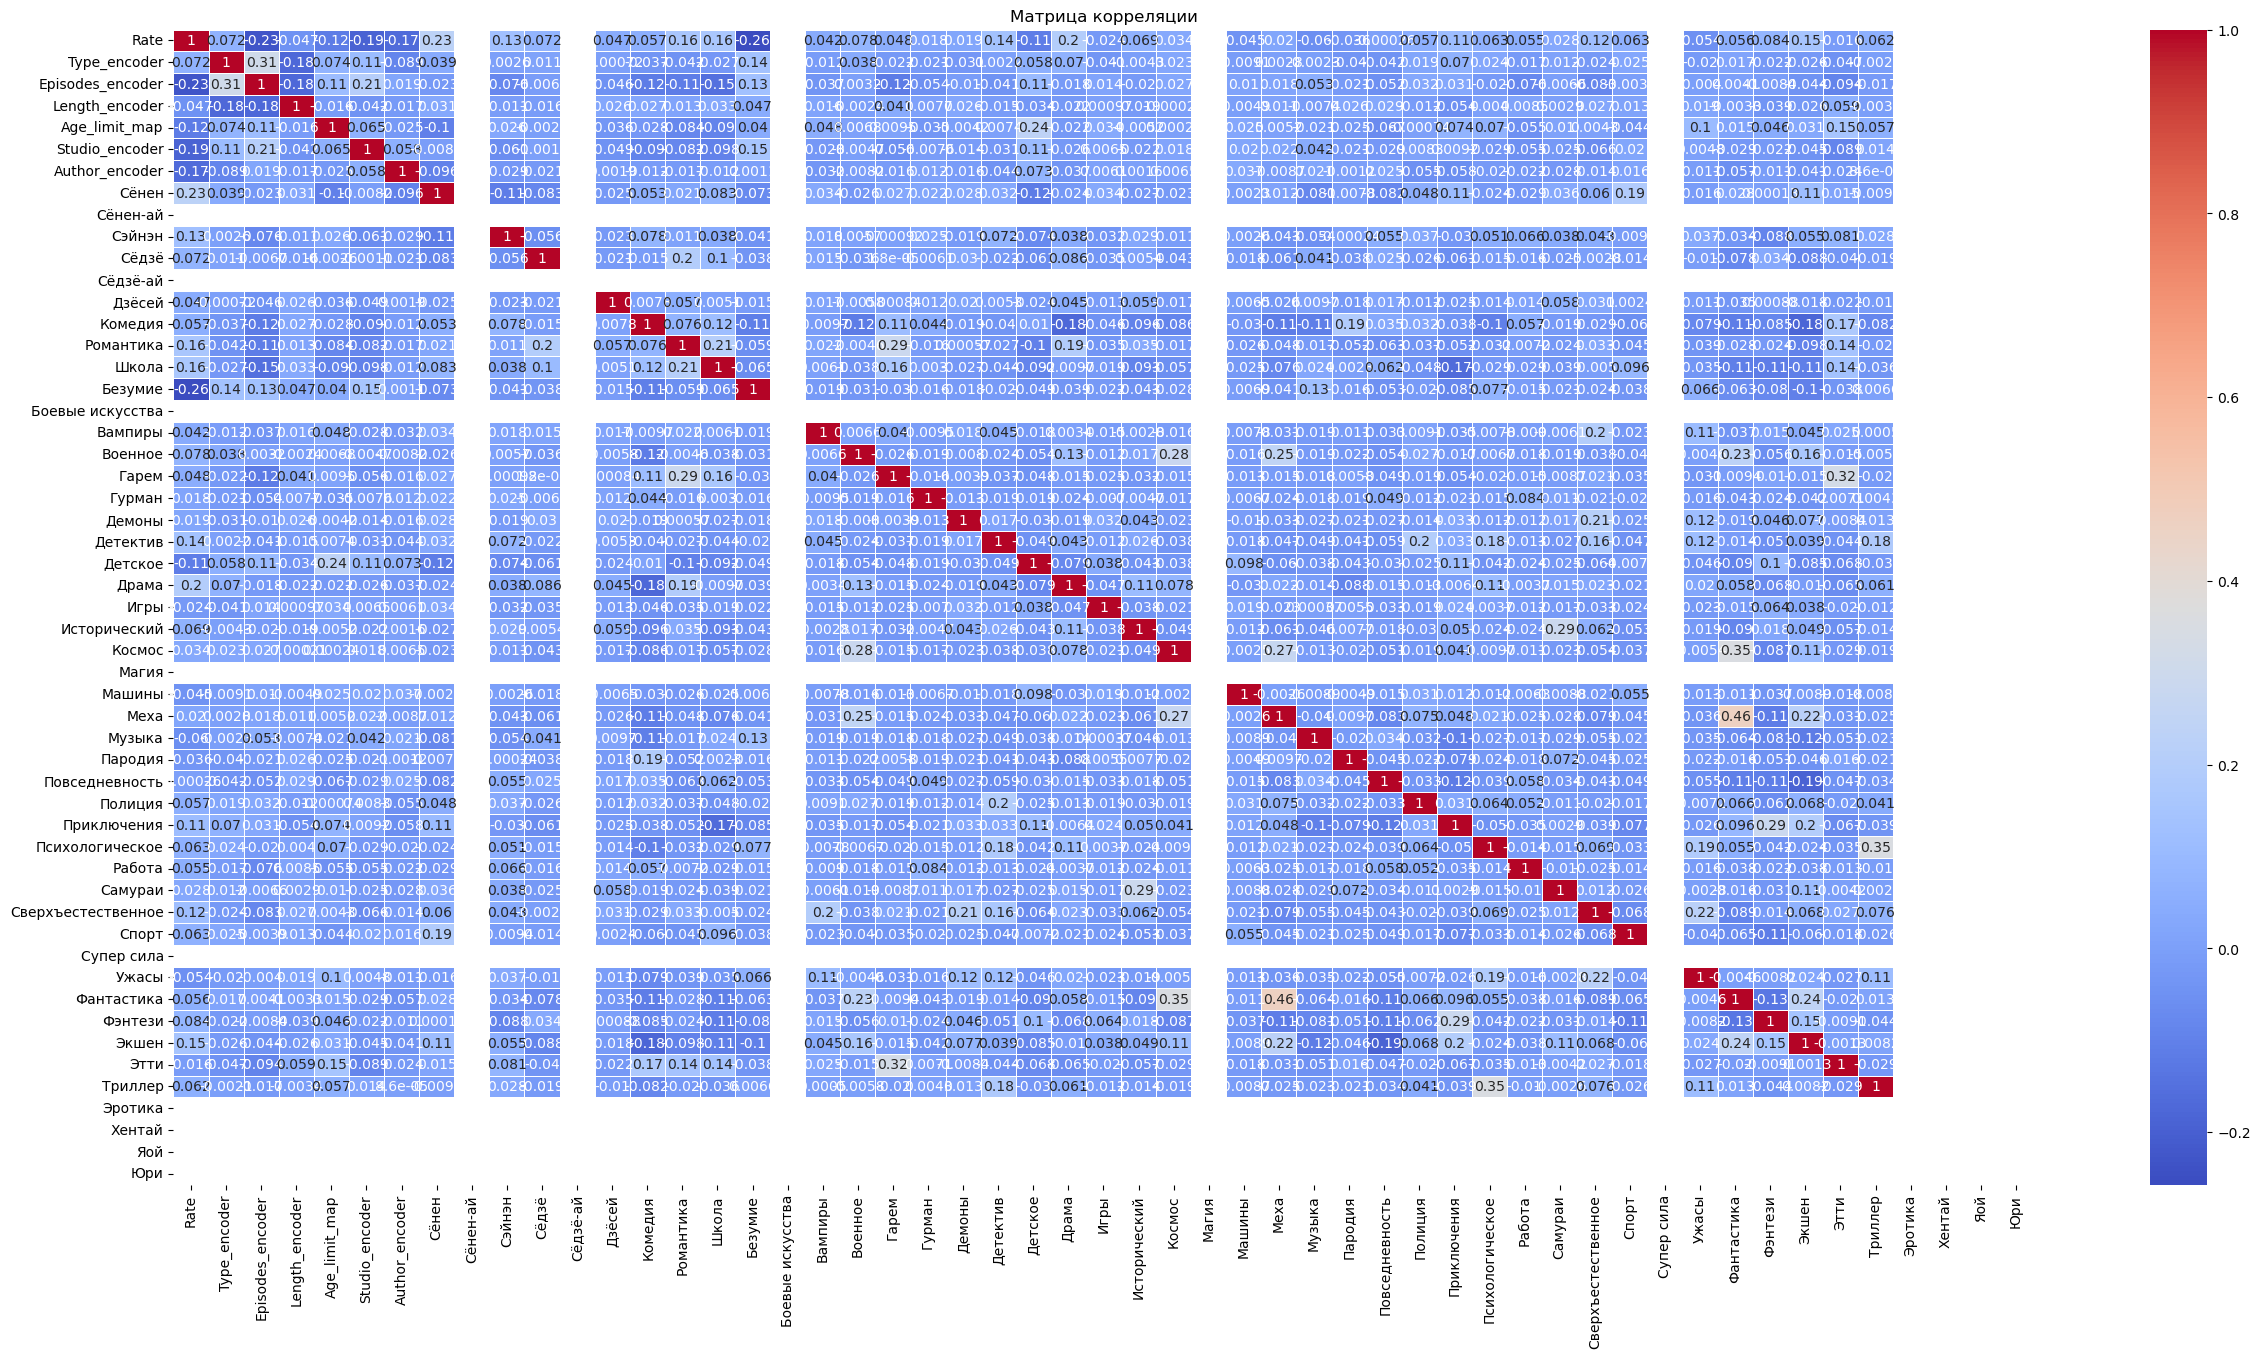

In [3]:
correlation_matrix = data.corr()

plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляции")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Необходимот отделить целевую переменную от остальных 
X = data.iloc[:, 1:] #Все, кроме первого
y = data['Rate']

In [6]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.57
R-squared: 0.34


In [7]:
preprocessed_data = pd.read_csv('preprocessed_data.csv')
preprocessed_data

,Type_encoder,Episodes_encoder,Length_encoder,Age_limit_map,Studio_encoder,Author_encoder,Сёнен,Сёнен-ай,Сэйнэн,Сёдзё,...,Ужасы,Фантастика,Фэнтези,Экшен,Этти,Триллер,Эротика,Хентай,Яой,Юри
0,2,24,107,0,374,2512,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y_pred = model.predict(preprocessed_data)
print(y_pred)

[7.54527221]


In [9]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv - количество складок (фолдов)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.32965595 0.32762623 0.30692767 0.32202697 0.34724015]
Mean CV Score: 0.32669539451632834


In [10]:
import statsmodels.api as sm

# Добавляем константный признак для модели statsmodels
X_train_sm = sm.add_constant(X_train)

# Создаем и обучаем модель линейной регрессии
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Предсказание на тестовой выборке
X_test_sm = sm.add_constant(X_test)
y_pred_sm = model_sm.predict(X_test_sm)

# Оценка качества модели
mse_sm = mean_squared_error(y_test, y_pred_sm)
r2_sm = r2_score(y_test, y_pred_sm)

print("Statsmodels Linear Regression:")
print(f"Mean Squared Error: {mse_sm:.2f}")
print(f"R-squared: {r2_sm:.2f}")
print(model_sm.summary())


Statsmodels Linear Regression:
Mean Squared Error: 0.57
R-squared: 0.34
                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     119.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:27:54   Log-Likelihood:                -11535.
No. Observations:               10256   AIC:                         2.316e+04
Df Residuals:                   10212   BIC:                         2.348e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

data = pd.read_csv('one_hot_data.csv')
# Разделение на тренировочный и тестовый наборы
X = data.drop('Rate', axis=1)
y = data['Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 2.7477935120579133e+23
Mean Absolute Error: 104319051166.58835
R^2 Score: -3.206820527452411e+23
